# California Housing Data Modeling

In [ ]:
# Importing the packages needed for Linear Regression Analysis Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rc('figure',figsize=(12,6))

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data Importing

In [ ]:


data =pd.read_csv('C:\\Users\\User\\Desktop\\Masters in Computer Science\\Data Science\\Projects\\housing.csv')

In [6]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# Data Cleaning

    # 1. Missing Values 
    # 2. Outliers

In [ ]:


data.isnull().sum()


In [8]:
# Fill missing values in the column with Mean value.

missing_column =['total_bedrooms']

for i in missing_column:
    data.loc[data.loc[:,i].isnull(),i] = data.loc[:,i].mean()


In [9]:
# See outliers at a high level

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# Detect outliers using functions

def outliers(mydata):
    dataoutlier = []
    mydata = sorted(mydata)
    
    q1 = np.percentile(mydata,0.25)
    q3 = np.percentile(mydata,0.75)
    IQR = q3-q1
    outlier_low = q1-(1.5*IQR)
    outlier_upp = q3+(1.5*IQR)
    
    for i in mydata:
        if(i < outlier_low or i > outlier_upp):
            dataoutlier.append(i)
    return dataoutlier    



In [68]:
#outliers(data['total_rooms'])

In [12]:
# Population Max -35682.0 
# Population Min -3
# Notting both these values to know the outlier treatment later.


In [15]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [18]:
# Outlier treament of all columns.
# replace outlier with 10th and 90th values

columns =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

for i in columns:
    ninetieth_percentile = np.percentile(data[i],90) # data[i] is one particular column
    tenth_percentile = np.percentile(data[i],10)
    data[i] = np.where(data[i] > ninetieth_percentile , ninetieth_percentile, data[i])#[np.where(condition,x,y)if True x,else y}
    data[i] = np.where(data[i] < tenth_percentile , tenth_percentile, data[i])

In [19]:
data.describe() # here we can see population outliers removed.

# Thus data Cleaning is done Completely.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.00000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.568503,35.617599,28.69564,2394.851269,493.395196,1312.810320,460.361434,3.729510,200108.396318
std,1.894473,1.911786,10.98742,1170.830685,239.680759,646.821079,222.345882,1.371674,94780.790755
min,-122.290000,33.630000,13.00000,941.000000,199.000000,510.000000,184.000000,1.903800,82300.000000
25%,-121.800000,33.930000,18.00000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.00000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.00000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-117.250000,38.480000,46.00000,4651.050000,959.010000,2566.000000,890.000000,6.159201,376600.000000


# Data Exploration

In [21]:
data.corr() # Shows relation btw 2 variables.
# values greater than 0.8 shows strong correlation.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.941034,-0.080849,0.022274,0.057823,0.117071,0.052726,-0.015816,-0.045116
latitude,-0.941034,1.000000,-0.005533,-0.017619,-0.060538,-0.130891,-0.070923,-0.068108,-0.131428
housing_median_age,-0.080849,-0.005533,1.000000,-0.381110,-0.326204,-0.303365,-0.305700,-0.147511,0.089808
total_rooms,0.022274,-0.017619,-0.381110,1.000000,0.902334,0.811843,0.900618,0.257549,0.187744
total_bedrooms,0.057823,-0.060538,-0.326204,0.902334,1.000000,0.859700,0.971609,-0.016879,0.070185
population,0.117071,-0.130891,-0.303365,0.811843,0.859700,1.000000,0.896154,-0.003466,-0.023888
households,0.052726,-0.070923,-0.305700,0.900618,0.971609,0.896154,1.000000,0.016050,0.091939
median_income,-0.015816,-0.068108,-0.147511,0.257549,-0.016879,-0.003466,0.016050,1.000000,0.671170
median_house_value,-0.045116,-0.131428,0.089808,0.187744,0.070185,-0.023888,0.091939,0.671170,1.000000


<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

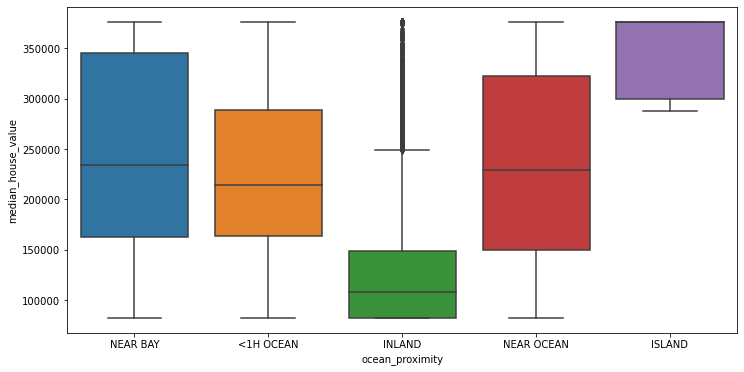

In [25]:
# Check prices of houses near the ocean

sns.boxplot(x='ocean_proximity',y='median_house_value',data=data)
#island houses have higher prices.

<AxesSubplot:xlabel='ocean_proximity', ylabel='housing_median_age'>

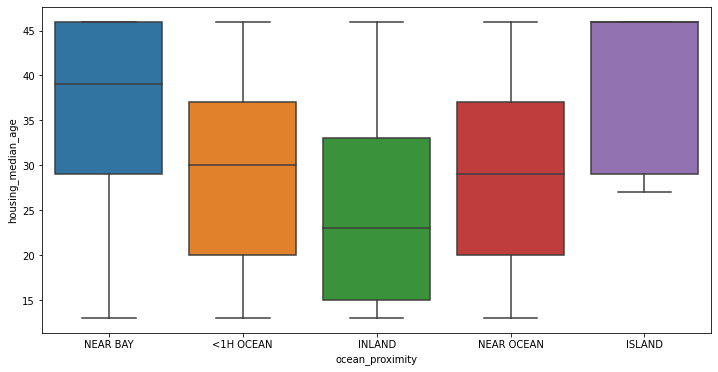

In [26]:
# Near Bay and Island houses last longer.
sns.boxplot(x='ocean_proximity',y='housing_median_age',data=data)

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_income'>

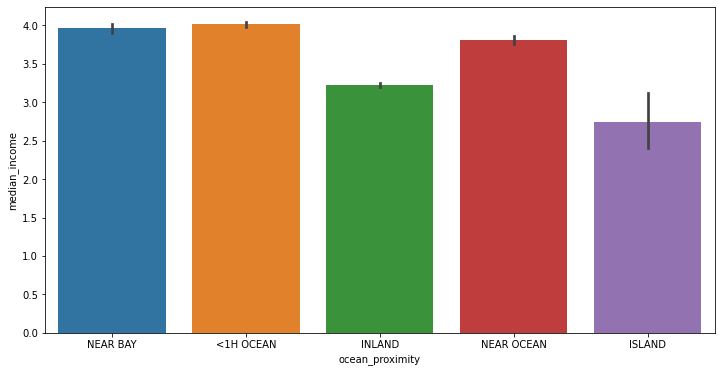

In [30]:
sns.barplot(x='ocean_proximity',y='median_income',data=data)

# Feature Engineering

In [33]:
data['is_island'] = data.apply(lambda x : 1 if (x['ocean_proximity']=='ISLAND') else 0, axis=1)

In [34]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,is_island
0,-122.23,37.88,41.0,941.00,199.00,510.0,184.0,6.159201,376600.0,NEAR BAY,0
1,-122.22,37.86,21.0,4651.05,959.01,2401.0,890.0,6.159201,358500.0,NEAR BAY,0
2,-122.24,37.85,46.0,1467.00,199.00,510.0,184.0,6.159201,352100.0,NEAR BAY,0
3,-122.25,37.85,46.0,1274.00,235.00,558.0,219.0,5.643100,341300.0,NEAR BAY,0
4,-122.25,37.85,46.0,1627.00,280.00,565.0,259.0,3.846200,342200.0,NEAR BAY,0
5,-122.25,37.85,46.0,941.00,213.00,510.0,193.0,4.036800,269700.0,NEAR BAY,0
6,-122.25,37.84,46.0,2535.00,489.00,1094.0,514.0,3.659100,299200.0,NEAR BAY,0
7,-122.25,37.84,46.0,3104.00,687.00,1157.0,647.0,3.120000,241400.0,NEAR BAY,0
8,-122.26,37.84,42.0,2555.00,665.00,1206.0,595.0,2.080400,226700.0,NEAR BAY,0
9,-122.25,37.84,46.0,3549.00,707.00,1551.0,714.0,3.691200,261100.0,NEAR BAY,0


# Model Training

In [40]:
dummified = pd.get_dummies(data,columns=['ocean_proximity'])

# to change categorical columns into numerical values by splitting

In [41]:
dummified.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,is_island,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,941.00,199.00,510.0,184.0,6.159201,376600.0,0,0,0,0,1,0
1,-122.22,37.86,21.0,4651.05,959.01,2401.0,890.0,6.159201,358500.0,0,0,0,0,1,0
2,-122.24,37.85,46.0,1467.00,199.00,510.0,184.0,6.159201,352100.0,0,0,0,0,1,0
3,-122.25,37.85,46.0,1274.00,235.00,558.0,219.0,5.643100,341300.0,0,0,0,0,1,0
4,-122.25,37.85,46.0,1627.00,280.00,565.0,259.0,3.846200,342200.0,0,0,0,0,1,0
5,-122.25,37.85,46.0,941.00,213.00,510.0,193.0,4.036800,269700.0,0,0,0,0,1,0
6,-122.25,37.84,46.0,2535.00,489.00,1094.0,514.0,3.659100,299200.0,0,0,0,0,1,0
7,-122.25,37.84,46.0,3104.00,687.00,1157.0,647.0,3.120000,241400.0,0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.00,665.00,1206.0,595.0,2.080400,226700.0,0,0,0,0,1,0
9,-122.25,37.84,46.0,3549.00,707.00,1551.0,714.0,3.691200,261100.0,0,0,0,0,1,0


In [42]:
dummified.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'is_island', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [43]:
# Linear regression equation y=mx1+mx2+mx3+mx4....+c

# Giving all other columns we need to predict the median house value

In [51]:
x = dummified[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'is_island', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]

y = dummified[['median_house_value']]

In [53]:
# here we want to split the data for training(larger data set) and testing(lesser data set) from the data set we have
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)



# Running linear regression

In [55]:
# Train my model
model = LinearRegression()
model.fit(xtrain,ytrain) ### these both go to the model

LinearRegression()

In [64]:
### This is the available model now
### Now predict with the test data

x_pred = model.predict(xtest)  # predict xtest based on the model(xtrain,ytrain)

In [61]:
model.coef_

array([[-3.13236507e+04, -3.16610415e+04,  9.47161387e+02,
        -5.01915592e+00,  1.20558722e+02, -6.37980023e+01,
         1.03823777e+02,  4.20136343e+04,  6.22795634e+04,
        -6.98125214e+03, -4.05384559e+04,  6.22795634e+04,
        -1.13979144e+04, -3.36194092e+03]])

In [62]:
model.intercept_  ### the slope value C

array([-2595203.93423441])

# Model Evaluation

    # Now compare xtest with ytest

In [66]:
r2_score(ytest,x_pred) ### How good is your model

0.6540233015643875

# Model is 65% accurate.